# Using Ragas to Evaluate a RAG Application built with LangChain and LangGraph

In the following notebook, we'll be looking at how [Ragas](https://github.com/explodinggradients/ragas) can be helpful in a number of ways when looking to evaluate your RAG applications!

While this example is rooted in LangChain/LangGraph - Ragas is framework agnostic (you don't even need to be using a framework!).

- 🤝 Breakout Room #1
  1. Task 1: Installing Required Libraries
  2. Task 2: Set Environment Variables
  3. Task 3: Synthetic Dataset Generation for Evaluation using Ragas
  4. Task 4: Evaluating our Pipeline with Ragas
  5. Task 6: Making Adjustments and Re-Evaluating

But first! Let's set some dependencies!

## Dependencies and API Keys:

We'll also need to provide our API keys.

First, OpenAI's for our LLM/embedding model combination!

In [1]:
import os
import dotenv

dotenv.load_dotenv()

True

In [2]:
# import os
# from getpass import getpass
# os.environ["OPENAI_API_KEY"] = getpass("Please enter your OpenAI API key!")

## Generating Synthetic Test Data

We wil be using Ragas to build out a set of synthetic test questions, references, and reference contexts. This is useful because it will allow us to find out how our system is performing.

> NOTE: Ragas is best suited for finding *directional* changes in your LLM-based systems. The absolute scores aren't comparable in a vacuum.

### Data Preparation

We'll prepare our data - which should hopefull be familiar at this point since it's our Loan Data use-case!

Next, let's load our data into a familiar LangChain format using the `DirectoryLoader`.

In [3]:
from langchain_community.document_loaders import DirectoryLoader
from langchain_community.document_loaders import PyMuPDFLoader


path = "data/"
loader = DirectoryLoader(path, glob="*.pdf", loader_cls=PyMuPDFLoader)
docs = loader.load()

### Knowledge Graph Based Synthetic Generation

Ragas uses a knowledge graph based approach to create data. This is extremely useful as it allows us to create complex queries rather simply. The additional testset complexity allows us to evaluate larger problems more effectively, as systems tend to be very strong on simple evaluation tasks.

Let's start by defining our `generator_llm` (which will generate our questions, summaries, and more), and our `generator_embeddings` which will be useful in building our graph.

### Abstracted SDG

The above method is the full process - but we can shortcut that using the provided abstractions!

This will generate our knowledge graph under the hood, and will - from there - generate our personas and scenarios to construct our queries.



In [4]:
from ragas.llms import LangchainLLMWrapper
from ragas.embeddings import LangchainEmbeddingsWrapper
from langchain_openai import ChatOpenAI
from langchain_openai import OpenAIEmbeddings
generator_llm = LangchainLLMWrapper(ChatOpenAI(model="gpt-4.1"))
generator_embeddings = LangchainEmbeddingsWrapper(OpenAIEmbeddings())

In [5]:
from ragas.testset import TestsetGenerator

generator = TestsetGenerator(llm=generator_llm, embedding_model=generator_embeddings)
dataset = generator.generate_with_langchain_docs(docs[:20], testset_size=10)

Applying HeadlinesExtractor:   0%|          | 0/17 [00:00<?, ?it/s]

Applying HeadlineSplitter:   0%|          | 0/20 [00:00<?, ?it/s]

unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node
unable to apply transformation: 'headlines' property not found in this node


Applying SummaryExtractor:   0%|          | 0/31 [00:00<?, ?it/s]

Property 'summary' already exists in node '033368'. Skipping!
Property 'summary' already exists in node '1f6bd8'. Skipping!
Property 'summary' already exists in node 'c4dcbe'. Skipping!
Property 'summary' already exists in node '2c5f89'. Skipping!
Property 'summary' already exists in node 'aa5244'. Skipping!
Property 'summary' already exists in node '29fe56'. Skipping!
Property 'summary' already exists in node 'fed0c1'. Skipping!
Property 'summary' already exists in node '141acc'. Skipping!
Property 'summary' already exists in node 'a69bf7'. Skipping!
Property 'summary' already exists in node '18e859'. Skipping!
Property 'summary' already exists in node '9db9eb'. Skipping!
Property 'summary' already exists in node '378a8f'. Skipping!
Property 'summary' already exists in node 'c20003'. Skipping!
Property 'summary' already exists in node '5f288c'. Skipping!


Applying CustomNodeFilter:   0%|          | 0/6 [00:00<?, ?it/s]

Applying [EmbeddingExtractor, ThemesExtractor, NERExtractor]:   0%|          | 0/41 [00:00<?, ?it/s]

Property 'summary_embedding' already exists in node '9db9eb'. Skipping!
Property 'summary_embedding' already exists in node '1f6bd8'. Skipping!
Property 'summary_embedding' already exists in node '2c5f89'. Skipping!
Property 'summary_embedding' already exists in node '033368'. Skipping!
Property 'summary_embedding' already exists in node 'fed0c1'. Skipping!
Property 'summary_embedding' already exists in node 'c4dcbe'. Skipping!
Property 'summary_embedding' already exists in node 'a69bf7'. Skipping!
Property 'summary_embedding' already exists in node 'aa5244'. Skipping!
Property 'summary_embedding' already exists in node '18e859'. Skipping!
Property 'summary_embedding' already exists in node '141acc'. Skipping!
Property 'summary_embedding' already exists in node 'c20003'. Skipping!
Property 'summary_embedding' already exists in node '29fe56'. Skipping!
Property 'summary_embedding' already exists in node '378a8f'. Skipping!
Property 'summary_embedding' already exists in node '5f288c'. Sk

Applying [CosineSimilarityBuilder, OverlapScoreBuilder]:   0%|          | 0/2 [00:00<?, ?it/s]

Generating personas:   0%|          | 0/3 [00:00<?, ?it/s]

Generating Scenarios:   0%|          | 0/3 [00:00<?, ?it/s]

Generating Samples:   0%|          | 0/12 [00:00<?, ?it/s]

In [6]:
dataset.to_pandas()

,user_input,reference_contexts,reference,synthesizer_name
0,What is a Scheduled Academic Year in the conte...,"[non-term (includes clock-hour calendars), or ...",In a program using a Scheduled Academic Year (...,single_hop_specifc_query_synthesizer
1,Are there exceptions to the normal Direct Loan...,[Inclusion of Clinical Work in a Standard Term...,"Yes, there are exceptions to the normal loan p...",single_hop_specifc_query_synthesizer
2,What are the payment period requirements for T...,[Non-Term Characteristics A program that measu...,"For Title IV programs, disbursements (except f...",single_hop_specifc_query_synthesizer
3,How is a student's Pell Grant amount determine...,[both the credit or clock hours and the weeks ...,The Pell Grant amount that a student is eligib...,single_hop_specifc_query_synthesizer
4,if clinical work is included in a standard ter...,[<1-hop>\n\nInclusion of Clinical Work in a St...,if clinical work in a medical or education pro...,multi_hop_abstract_query_synthesizer
5,how disbursement timing for federal student ai...,[<1-hop>\n\nboth the credit or clock hours and...,in clock-hour or non-term credit-hour programs...,multi_hop_abstract_query_synthesizer
6,How does the structure of a subscription-based...,[<1-hop>\n\nnon-term (includes clock-hour cale...,"In a subscription-based academic calendar, whi...",multi_hop_abstract_query_synthesizer
7,What are the differences in disbursement timin...,[<1-hop>\n\nboth the credit or clock hours and...,In clock-hour or non-term credit-hour programs...,multi_hop_abstract_query_synthesizer
8,If a medical program includes clinical work th...,[<1-hop>\n\nInclusion of Clinical Work in a St...,If a medical program includes clinical work th...,multi_hop_specific_query_synthesizer
9,"Wut guidance is provided in Volume 2, Chapter ...",[<1-hop>\n\nnon-term (includes clock-hour cale...,"Volume 2, Chapter 2 provides detail on subscri...",multi_hop_specific_query_synthesizer


## LangChain RAG

Now we'll construct our LangChain RAG, which we will be evaluating using the above created test data!

### R - Retrieval

Let's start with building our retrieval pipeline, which will involve loading the same data we used to create our synthetic test set above.

> NOTE: We need to use the same data - as our test set is specifically designed for this data.

In [7]:
path = "data/"
loader = DirectoryLoader(path, glob="*.pdf", loader_cls=PyMuPDFLoader)
docs = loader.load()

Now that we have our data loaded, let's split it into chunks!

In [8]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
split_documents = text_splitter.split_documents(docs)
len(split_documents)

1102

#### ❓ Question #1: 

What is the purpose of the `chunk_overlap` parameter in the `RecursiveCharacterTextSplitter`?

#### ✅  Answer: #1 
The purpose of overlapping chunks is to get context from the neighboring chunks. It should not be too large compared to the chunk size to prevent confusion by bringing in unrelated context.

Next up, we'll need to provide an embedding model that we can use to construct our vector store.

In [9]:
from langchain_openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings(model="text-embedding-3-small")

Now we can build our in memory QDrant vector store.

In [10]:
from langchain_qdrant import QdrantVectorStore
from qdrant_client import QdrantClient
from qdrant_client.http.models import Distance, VectorParams

client = QdrantClient(":memory:")

client.create_collection(
    collection_name="loan_data",
    vectors_config=VectorParams(size=1536, distance=Distance.COSINE),
)

vector_store = QdrantVectorStore(
    client=client,
    collection_name="loan_data",
    embedding=embeddings,
)

We can now add our documents to our vector store.

In [11]:
_ = vector_store.add_documents(documents=split_documents)

Let's define our retriever.

In [12]:
retriever = vector_store.as_retriever(search_kwargs={"k": 5})

Now we can produce a node for retrieval!

In [13]:
def retrieve(state):
  retrieved_docs = retriever.invoke(state["question"])
  return {"context" : retrieved_docs}

### Augmented

Let's create a simple RAG prompt!

In [14]:
from langchain.prompts import ChatPromptTemplate

RAG_PROMPT = """\
You are a helpful assistant who answers questions based on provided context. You must only use the provided context, and cannot use your own knowledge.

### Question
{question}

### Context
{context}
"""

rag_prompt = ChatPromptTemplate.from_template(RAG_PROMPT)

### Generation

We'll also need an LLM to generate responses - we'll use `gpt-4o-nano` to avoid using the same model as our judge model.

In [15]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4.1-nano")

Then we can create a `generate` node!

In [16]:
def generate(state):
  docs_content = "\n\n".join(doc.page_content for doc in state["context"])
  messages = rag_prompt.format_messages(question=state["question"], context=docs_content)
  response = llm.invoke(messages)
  return {"response" : response.content}

### Building RAG Graph with LangGraph

Let's create some state for our LangGraph RAG graph!

In [17]:
from langgraph.graph import START, StateGraph
from typing_extensions import List, TypedDict
from langchain_core.documents import Document

class State(TypedDict):
  question: str
  context: List[Document]
  response: str

Now we can build our simple graph!

> NOTE: We're using `add_sequence` since we will always move from retrieval to generation. This is essentially building a chain in LangGraph.

In [18]:
graph_builder = StateGraph(State).add_sequence([retrieve, generate])
graph_builder.add_edge(START, "retrieve")
graph = graph_builder.compile()

Let's do a test to make sure it's doing what we'd expect.

In [19]:
response = graph.invoke({"question" : "What are the different kinds of loans?"})

In [20]:
response["response"]

'Based on the provided context, the different kinds of loans mentioned are:\n\n1. Direct Loan\n2. Direct Unsubsidized Loan\n\nThese are the primary types of loans referenced in the context.'

## Evaluating the App with Ragas

Now we can finally do our evaluation!

We'll start by running the queries we generated usign SDG above through our application to get context and responses.

In [21]:
for test_row in dataset:
  response = graph.invoke({"question" : test_row.eval_sample.user_input})
  test_row.eval_sample.response = response["response"]
  test_row.eval_sample.retrieved_contexts = [context.page_content for context in response["context"]]

In [22]:
dataset.samples[0].eval_sample.response

'A Scheduled Academic Year (SAY) in the context of standard term academic calendars is a traditional academic year that typically begins and ends at the same time each calendar year, such as starting with the fall semester and ending with the spring semester. It usually includes a set period of instructional time aligned with the academic calendar, meeting the Title IV requirements for an academic year. An SAY may encompass one or more terms that a student does not attend, and it is based on a calendar that has terms starting and ending around the same time each year, such as fall and spring semesters or fall, winter, and spring quarters.'

Then we can convert that table into a `EvaluationDataset` which will make the process of evaluation smoother.

In [23]:
from ragas import EvaluationDataset

evaluation_dataset = EvaluationDataset.from_pandas(dataset.to_pandas())

We'll need to select a judge model - in this case we're using the same model that was used to generate our Synthetic Data.

In [24]:
from ragas import evaluate
from ragas.llms import LangchainLLMWrapper

evaluator_llm = LangchainLLMWrapper(ChatOpenAI(model="gpt-4.1-mini"))

Next up - we simply evaluate on our desired metrics!

In [25]:
from ragas.metrics import LLMContextRecall, Faithfulness, FactualCorrectness, ResponseRelevancy, ContextEntityRecall, NoiseSensitivity
from ragas import evaluate, RunConfig

custom_run_config = RunConfig(timeout=360)

result = evaluate(
    dataset=evaluation_dataset,
    metrics=[LLMContextRecall(), Faithfulness(), FactualCorrectness(), ResponseRelevancy(), ContextEntityRecall(), NoiseSensitivity()],
    llm=evaluator_llm,
    run_config=custom_run_config
)
result

Evaluating:   0%|          | 0/72 [00:00<?, ?it/s]

{'context_recall': 0.8667, 'faithfulness': 0.9349, 'factual_correctness': 0.6358, 'answer_relevancy': 0.8913, 'context_entity_recall': 0.2684, 'noise_sensitivity_relevant': 0.3098}

## Making Adjustments and Re-Evaluating

Now that we've got our baseline - let's make a change and see how the model improves or doesn't improve!

> NOTE: This will be using Cohere's Rerank model - please be sure to [sign-up for an API key!](https://docs.cohere.com/reference/about)

In [26]:
# os.environ["COHERE_API_KEY"] = getpass("Please enter your Cohere API key!")


We'll first set our retriever to return more documents, which will allow us to take advantage of the reranking.

In [27]:
adjusted_example_retriever = vector_store.as_retriever(search_kwargs={"k": 20})

Reranking, or contextual compression, is a technique that uses a reranker to compress the retrieved documents into a smaller set of documents.

This is essentially a slower, more accurate form of semantic similarity that we use on a smaller subset of our documents.

In [28]:
from langchain.retrievers.contextual_compression import ContextualCompressionRetriever
from langchain_cohere import CohereRerank

def retrieve_adjusted(state):
  compressor = CohereRerank(model="rerank-v3.5")
  compression_retriever = ContextualCompressionRetriever(
    base_compressor=compressor, base_retriever=adjusted_example_retriever, search_kwargs={"k": 5}
  )
  retrieved_docs = compression_retriever.invoke(state["question"])
  return {"context" : retrieved_docs}

We can simply rebuild our graph with the new retriever!

In [29]:
class AdjustedState(TypedDict):
  question: str
  context: List[Document]
  response: str

adjusted_graph_builder = StateGraph(AdjustedState).add_sequence([retrieve_adjusted, generate])
adjusted_graph_builder.add_edge(START, "retrieve_adjusted")
adjusted_graph = adjusted_graph_builder.compile()

In [30]:
response = adjusted_graph.invoke({"question" : "What are the different kinds of loans?"})
response["response"]

'The context mentions the following loan types:\n\n- Federal PLUS Loans\n- Federal Family Education Loan (FFEL) Program loans (before July 1, 2010)\n- Direct Subsidized Loans\n- Direct Unsubsidized Loans\n- Student Direct PLUS Loans (a type of PLUS Loan)\n\nThese are the different kinds of loans referenced in the provided information.'

In [31]:
import time
import copy

rerank_dataset = copy.deepcopy(dataset)

for test_row in rerank_dataset:
  response = adjusted_graph.invoke({"question" : test_row.eval_sample.user_input})
  test_row.eval_sample.response = response["response"]
  test_row.eval_sample.retrieved_contexts = [context.page_content for context in response["context"]]
  time.sleep(2) # To try to avoid rate limiting.

In [32]:
rerank_dataset.samples[0].eval_sample.response

'A Scheduled Academic Year (SAY) in the context of standard term academic calendars is a traditional academic year that typically begins and ends at the same time each year, such as starting with the fall semester and ending with the spring semester. It usually includes two or more terms, such as fall and spring, and may also include summer, which can be shorter or longer. The SAY must meet Title IV requirements for an academic year and is characterized by having terms that start and end around the same time each year, with the possibility of including one or more terms that a student does not attend.'

In [33]:
rerank_evaluation_dataset = EvaluationDataset.from_pandas(rerank_dataset.to_pandas())

In [34]:
result = evaluate(
    dataset=rerank_evaluation_dataset,
    metrics=[LLMContextRecall(), Faithfulness(), FactualCorrectness(), ResponseRelevancy(), ContextEntityRecall(), NoiseSensitivity()],
    llm=evaluator_llm,
    run_config=custom_run_config
)
result

Evaluating:   0%|          | 0/72 [00:00<?, ?it/s]

{'context_recall': 0.9188, 'faithfulness': 0.8560, 'factual_correctness': 0.5550, 'answer_relevancy': 0.9538, 'context_entity_recall': 0.2980, 'noise_sensitivity_relevant': 0.3599}

#### ❓ Question: 

Which system performed better, on what metrics, and why?

'context_recall': 0.8667, 'faithfulness': 0.9349, 'factual_correctness': 0.6358, 'answer_relevancy': 0.8913, 'context_entity_recall': 0.2684, 'noise_sensitivity_relevant': 0.3098

'context_recall': 0.9188, 'faithfulness': 0.8560, 'factual_correctness': 0.5550, 'answer_relevancy': 0.9538, 'context_entity_recall': 0.2980, 'noise_sensitivity_relevant': 0.3599

In the Cohere reranker we retrieved information from the top 20 pre-rearranged chunks which were also compressed.   
vector_store.as_retriever(search_kwargs={"k": 20}) and then compressing aggressively:   
compression_retriever = ContextualCompressionRetriever(
    base_compressor=compressor, base_retriever=adjusted_example_retriever, search_kwargs={"k": 5}
  ) from 20 down to 5 documents results in filtering information
which results in generating answers with reduced factual correctness and faithfulness.  

Claude-4-sonnet
The system with Cohere reranker retrieved 20 documents initially, then used Cohere's rerank-v3.5 model to rerank and compress them down to the top 5 most relevant documents. However, the reranked system performed worse on most metrics:
Context Recall: 0.7816 (baseline) vs 0.6892 (reranked) - worse
Context Entity Recall: 0.5322 (baseline) vs 0.4116 (reranked) - worse
Faithfulness: 0.8478 (baseline) vs 0.8610 (reranked) - slightly better
Factual Correctness: 0.5367 (baseline) vs 0.5308 (reranked) - slightly worse
The reranker's aggressive compression from 20 to 5 documents appears to have filtered out contextually important information that was needed for comprehensive answers. While reranking improved document relevance precision, it reduced the overall information coverage, harming recall-based metrics. This suggests that for this dataset, the original vector similarity search was already effective at identifying useful documents.

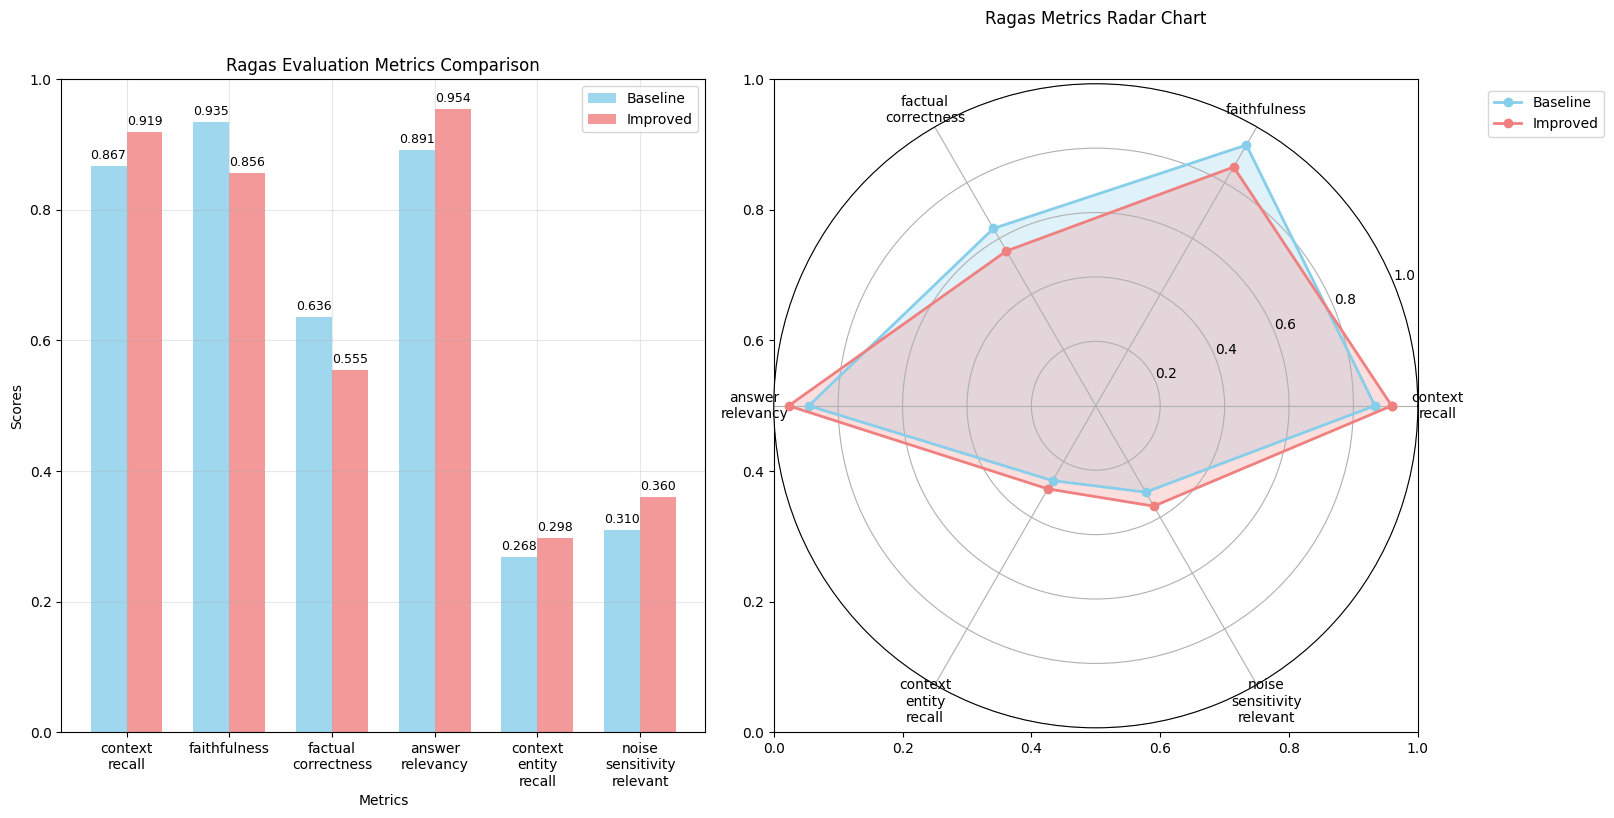


Metric Differences (Improved - Baseline):
----------------------------------------
context_recall           : +0.0521 ↑
faithfulness             : -0.0789 ↓
factual_correctness      : -0.0808 ↓
answer_relevancy         : +0.0625 ↑
context_entity_recall    : +0.0296 ↑
noise_sensitivity_relevant: +0.0501 ↑


In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Results data - replace the second set with your actual different results
baseline_results = {
    'context_recall': 0.8667,
    'faithfulness': 0.9349, 
    'factual_correctness': 0.6358,
    'answer_relevancy': 0.8913, 
    'context_entity_recall': 0.2684, 
    'noise_sensitivity_relevant': 0.3098
}

# Replace these values with your actual second set of results
improved_results = {
    'context_recall': 0.9188, 
    'faithfulness': 0.8560, 
    'factual_correctness': 0.5550, 
    'answer_relevancy': 0.9538, 
    'context_entity_recall': 0.2980, 
    'noise_sensitivity_relevant': 0.3599
}

# Extract metric names and values
metrics = list(baseline_results.keys())
baseline_values = list(baseline_results.values())
improved_values = list(improved_results.values())

# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Chart 1: Side-by-side bar comparison
x = np.arange(len(metrics))
width = 0.35

bars1 = ax1.bar(x - width/2, baseline_values, width, label='Baseline', color='skyblue', alpha=0.8)
bars2 = ax1.bar(x + width/2, improved_values, width, label='Improved', color='lightcoral', alpha=0.8)

ax1.set_xlabel('Metrics')
ax1.set_ylabel('Scores')
ax1.set_title('Ragas Evaluation Metrics Comparison')
ax1.set_xticks(x)
ax1.set_xticklabels([metric.replace('_', '\n') for metric in metrics], rotation=0, ha='center')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_ylim(0, 1)

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    ax1.annotate(f'{height:.3f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=9)

for bar in bars2:
    height = bar.get_height()
    ax1.annotate(f'{height:.3f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=9)

# Chart 2: Radar chart
angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]  # Complete the circle

baseline_values_radar = baseline_values + baseline_values[:1]
improved_values_radar = improved_values + improved_values[:1]

ax2 = plt.subplot(122, projection='polar')
ax2.plot(angles, baseline_values_radar, 'o-', linewidth=2, label='Baseline', color='skyblue')
ax2.fill(angles, baseline_values_radar, alpha=0.25, color='skyblue')
ax2.plot(angles, improved_values_radar, 'o-', linewidth=2, label='Improved', color='lightcoral')
ax2.fill(angles, improved_values_radar, alpha=0.25, color='lightcoral')

ax2.set_xticks(angles[:-1])
ax2.set_xticklabels([metric.replace('_', '\n') for metric in metrics])
ax2.set_ylim(0, 1)
ax2.set_title('Ragas Metrics Radar Chart', y=1.08)
ax2.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
ax2.grid(True)

plt.tight_layout()
plt.show()

# Print differences
print("\nMetric Differences (Improved - Baseline):")
print("-" * 40)
for metric in metrics:
    diff = improved_results[metric] - baseline_results[metric]
    change = "↑" if diff > 0 else "↓" if diff < 0 else "="
    print(f"{metric:25}: {diff:+.4f} {change}") 

Radar Chart Conveys:
1. Overall Performance Shape:
    * Baseline (skyblue): More consistent, rounded shape
    * Improved/Cohere (coral): More angular, with pronounced peaks and valleys
2. Specific Performance Patterns:
      * Context Recall & Answer Relevancy: Cohere system extends further (better)
    * Faithfulness & Factual Correctness: Baseline extends further (better)
    * The shapes reveal trade-offs - Cohere improved retrieval quality but reduced content accuracy
3. Performance Distribution:
    * Baseline: More balanced performance across all metrics
    * Cohere: Higher variance - excels in some areas, struggles in others